In [0]:
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd
from keras.datasets import mnist
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
# application (model) imports
from keras import applications
import tensorflow as tf

Using TensorFlow backend.


In [0]:
#Here we import libraries nessesary to work with tensorflow datasets
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds

#Here we load the training part of the dataset and save the images to x_train and labels to y_train

caltech101_train = tfds.load('caltech_birds2010', split='train[:20%]',download=True, batch_size=-1)
caltech101_train = tfds.as_numpy(caltech101_train) 
x_train, y_train = caltech101_train["image"], caltech101_train["label"] # seperate the x and y
#Here we load a small  part (10%) of the flowerds test dataset and save the images to x_test and labels to y_test

caltech101_test = tfds.load('caltech_birds2010', split='test[:10%]',download=True,batch_size=-1)
caltech101_test = tfds.as_numpy(caltech101_test) 
x_test, y_test = caltech101_test["image"], caltech101_test["label"] # seperate the x and y

Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2010/0.1.0.incompleteUO1L12/caltech_birds2010-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/caltech_birds2010/0.1.0.incompleteUO1L12/caltech_birds2010-test.tfrecord



Dataset caltech_birds2010 downloaded and prepared to /root/tensorflow_datasets/caltech_birds2010/0.1.0. Subsequent calls will reuse this data.


(600, 500, 500, 3)


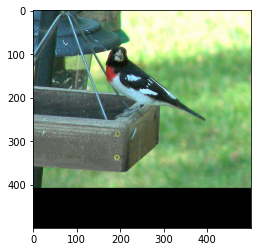

In [0]:
plt.imshow(x_train[10])
print(x_train.shape)

In [0]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
#Reshaping the data
x_train = x_train.astype('float32')
x_train = x_train / 255.0

#Reshaping the data
x_test = x_test.astype('float32')
x_test = x_test / 255.0

In [0]:
def plot_loss_accuracy(history):
    historydf = pd.DataFrame(history.history, index=history.epoch)
    plt.figure(figsize=(8, 6))
    historydf.plot(ylim=(0, max(1, historydf.values.max())))
    loss = history.history['loss'][-1]
    acc = history.history['accuracy'][-1]
    plt.title('Loss: %.3f, Accuracy: %.3f' % (loss, acc))

In [0]:
import gc
gc.collect()

7952

In [0]:
input_shape = (500,500,3)
num_classes=200
model = tf.keras.applications.ResNet101V2(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling='avg',
    classes=1000,
    classifier_activation="softmax",
)
predictions = Dense(num_classes, activation='softmax')(model.output)
model = Model(inputs = model.input, outputs=predictions)

171319296/171317808 [==============================] - 2s 0us/step


In [0]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, None, None, 6 0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [0]:
opt = SGD(lr=0.01)

In [0]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
34/34 [==============================] - 24s 702ms/step - loss: 5.3698 - accuracy: 0.0037 - val_loss: 5.2829 - val_accuracy: 0.0333
Epoch 2/10
34/34 [==============================] - 21s 623ms/step - loss: 4.6284 - accuracy: 0.1648 - val_loss: 5.1032 - val_accuracy: 0.0667
Epoch 3/10
34/34 [==============================] - 21s 624ms/step - loss: 3.8072 - accuracy: 0.5389 - val_loss: 4.9151 - val_accuracy: 0.1167
Epoch 4/10
34/34 [==============================] - 21s 623ms/step - loss: 2.9439 - accuracy: 0.7741 - val_loss: 4.5893 - val_accuracy: 0.1333
Epoch 5/10
34/34 [==============================] - 21s 622ms/step - loss: 2.1764 - accuracy: 0.9019 - val_loss: 4.4472 - val_accuracy: 0.1500
Epoch 6/10
34/34 [==============================] - 21s 625ms/step - loss: 1.5690 - accuracy: 0.9630 - val_loss: 4.2795 - val_accuracy: 0.1500
Epoch 7/10
34/34 [==============================] - 21s 624ms/step - loss: 1.0861 - accuracy: 0.9870 - val_loss: 4.0910 - val_accuracy: 0.2167

In [0]:
model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
34/34 [==============================] - 21s 627ms/step - loss: 0.2808 - accuracy: 0.9963 - val_loss: 3.7748 - val_accuracy: 0.2500
Epoch 2/10
34/34 [==============================] - 21s 623ms/step - loss: 0.2019 - accuracy: 0.9981 - val_loss: 3.7027 - val_accuracy: 0.2667
Epoch 3/10
34/34 [==============================] - 21s 624ms/step - loss: 0.1771 - accuracy: 0.9963 - val_loss: 3.6701 - val_accuracy: 0.2667
Epoch 4/10
34/34 [==============================] - 21s 625ms/step - loss: 0.1380 - accuracy: 0.9963 - val_loss: 3.6490 - val_accuracy: 0.2333
Epoch 5/10
34/34 [==============================] - 21s 623ms/step - loss: 0.1155 - accuracy: 0.9981 - val_loss: 3.6278 - val_accuracy: 0.2500
Epoch 6/10
34/34 [==============================] - 21s 623ms/step - loss: 0.0979 - accuracy: 0.9963 - val_loss: 3.6076 - val_accuracy: 0.2667
Epoch 7/10
34/34 [==============================] - 21s 623ms/step - loss: 0.0928 - accuracy: 0.9963 - val_loss: 3.6063 - val_accuracy: 0.2500

In [0]:
import gc
gc.collect()

7887

In [0]:
model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
34/34 [==============================] - 21s 626ms/step - loss: 0.0617 - accuracy: 0.9963 - val_loss: 3.5610 - val_accuracy: 0.2667
Epoch 2/10
34/34 [==============================] - 21s 623ms/step - loss: 0.0583 - accuracy: 0.9963 - val_loss: 3.5554 - val_accuracy: 0.2667
Epoch 3/10
34/34 [==============================] - 21s 624ms/step - loss: 0.0567 - accuracy: 0.9963 - val_loss: 3.5390 - val_accuracy: 0.2500
Epoch 4/10
34/34 [==============================] - 21s 624ms/step - loss: 0.0514 - accuracy: 0.9963 - val_loss: 3.5466 - val_accuracy: 0.2667
Epoch 5/10
34/34 [==============================] - 21s 624ms/step - loss: 0.0473 - accuracy: 0.9981 - val_loss: 3.5535 - val_accuracy: 0.2500
Epoch 6/10
34/34 [==============================] - 21s 623ms/step - loss: 0.0443 - accuracy: 0.9963 - val_loss: 3.5475 - val_accuracy: 0.3000
Epoch 7/10
34/34 [==============================] - 21s 624ms/step - loss: 0.0400 - accuracy: 0.9981 - val_loss: 3.5468 - val_accuracy: 0.2667

In [0]:
import gc
gc.collect()

4313

In [0]:
model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
34/34 [==============================] - 21s 626ms/step - loss: 0.0346 - accuracy: 0.9981 - val_loss: 3.5257 - val_accuracy: 0.2500
Epoch 2/10
34/34 [==============================] - 21s 623ms/step - loss: 0.0327 - accuracy: 0.9963 - val_loss: 3.5333 - val_accuracy: 0.2500
Epoch 3/10
34/34 [==============================] - 21s 624ms/step - loss: 0.0326 - accuracy: 0.9981 - val_loss: 3.5157 - val_accuracy: 0.2500
Epoch 4/10
34/34 [==============================] - 21s 625ms/step - loss: 0.0294 - accuracy: 0.9981 - val_loss: 3.5201 - val_accuracy: 0.2333
Epoch 5/10
34/34 [==============================] - 21s 624ms/step - loss: 0.0302 - accuracy: 0.9963 - val_loss: 3.5207 - val_accuracy: 0.2500
Epoch 6/10
34/34 [==============================] - 21s 623ms/step - loss: 0.0278 - accuracy: 0.9963 - val_loss: 3.5308 - val_accuracy: 0.2667
Epoch 7/10
34/34 [==============================] - 21s 622ms/step - loss: 0.0265 - accuracy: 0.9963 - val_loss: 3.5204 - val_accuracy: 0.2667

In [0]:
model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=True, validation_split=.1)

Epoch 1/10
34/34 [==============================] - 21s 627ms/step - loss: 0.0249 - accuracy: 0.9963 - val_loss: 3.4987 - val_accuracy: 0.2667
Epoch 2/10
34/34 [==============================] - 21s 625ms/step - loss: 0.0251 - accuracy: 0.9981 - val_loss: 3.5008 - val_accuracy: 0.2500
Epoch 3/10
34/34 [==============================] - 21s 625ms/step - loss: 0.0239 - accuracy: 0.9981 - val_loss: 3.4972 - val_accuracy: 0.2500
Epoch 4/10
34/34 [==============================] - 21s 624ms/step - loss: 0.0226 - accuracy: 0.9963 - val_loss: 3.5101 - val_accuracy: 0.2333
Epoch 5/10
34/34 [==============================] - 21s 625ms/step - loss: 0.0229 - accuracy: 0.9981 - val_loss: 3.5005 - val_accuracy: 0.2500
Epoch 6/10
34/34 [==============================] - 21s 624ms/step - loss: 0.0221 - accuracy: 0.9963 - val_loss: 3.5033 - val_accuracy: 0.2833
Epoch 7/10
34/34 [==============================] - 21s 623ms/step - loss: 0.0206 - accuracy: 0.9963 - val_loss: 3.4955 - val_accuracy: 0.2500